In [1]:
import pickle

with open('../../data/rice2/special_item_scores_epoch_9.pkl', 'rb') as f:
    special_item_scores = pickle.load(f)

with open('../../data/rice2/top_K_items_epoch_9.pkl', 'rb') as f:
    top_K_items = pickle.load(f)

entity2id, id2entity, id2pheno, pheno2id = {}, {}, {}, {}
with open('../../data/rice2/entity2id.txt', 'r') as f:
    for line in f:
        entity, idx = line.strip().split('\t')
        entity2id[entity] = int(idx)
        id2entity[int(idx)] = entity

with open('../../data/rice2/pheno2id.txt', 'r') as f:
    for line in f:
        pheno, idx = line.strip().split(' ')
        id2pheno[int(idx)] = pheno

In [2]:
pheno = 'photoperiod_sensing'
# pheno = 'photosynthetic_efficiency'
pos_items = set()
with open('../../data/rice2/train.txt', 'r') as f:
    for line in f:
        user, items = line.strip().split(' ')[0], line.strip().split(' ')[1:]
        if id2pheno[int(user)] == pheno:
            pos_items.update([int(item) for item in items])

top_1000_items = top_K_items[pheno]
scores, labels = [], []
for item in top_1000_items:
    scores.append(item[1])
    if entity2id[item[0]] in pos_items:  
        labels.append(1)
    else:
        labels.append(0)
# count the number of 1 and 0
print(sum(labels))
# calculate auc
from sklearn.metrics import roc_auc_score
print(roc_auc_score(labels, scores))

34
0.9521573963476955


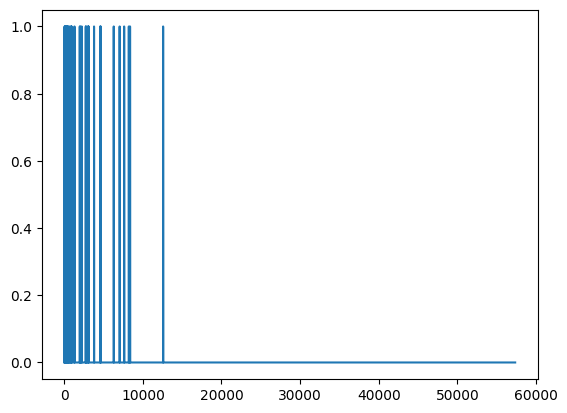

In [3]:
import matplotlib.pyplot as plt
# sort the labels based on the scores
sorted_labels = [x for _, x in sorted(zip(scores, labels), reverse=True)]
# draw a chart. x-axis is the index of the sorted labels, y-axis is the number of 1s in the top k items
plt.plot(sorted_labels)
plt.show()


In [4]:
special_item_tuples = []
for pheno in special_item_scores:
    for gene in special_item_scores[pheno]:
        special_item_tuples.append((gene, pheno, special_item_scores[pheno][gene]))
special_item_tuples.sort(key=lambda x: x[2], reverse=True)
with open('../../data/rice2/candidate_genes.txt', 'w') as f:
    f.write('gene phenotype score\n')
    for tuple in special_item_tuples:
        f.write(f"{tuple[0]} {tuple[1]} {tuple[2]}\n")
for pheno in ['photoperiod_sensing', 'photosynthetic_efficiency']:
    # print the top 10000 items
    top_items = sorted(top_K_items[pheno], key=lambda x: x[1], reverse=True)[:10000]
    with open(f'../../data/rice2/{pheno}_top_10000_genes.txt', 'w') as f:
        f.write('gene phenotype score\n')
        for item in top_items:
            f.write(f"{item[0]} {pheno} {item[1]}\n")